In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# a) Đọc dữ liệu từ Iris.xls vào dataframe
print('\n*** a) Đọc dữ liệu từ Iris.xls vào dataframe:')
# Default folder: 'C:\Users\AnTe'
# Muốn biết [default folder] thì thực hiện [File > Open]
LDS3folder = 'E:\Data Science\Mathematics and Statistics for Data Science\Excercise'
folder = LDS3folder + '/Data/B3/'
data = pd.read_excel(folder + 'Iris.xls')
print(data.head(), '\n')


*** a) Đọc dữ liệu từ Iris.xls vào dataframe:
   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa 




*** b) Tìm correlation matrix, trực quan hóa:
   - Ma trận hiệp phương sai (4, 4) : 
              sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.109369     0.871754    0.817954
sepalwidth     -0.109369    1.000000    -0.420516   -0.356544
petallength     0.871754   -0.420516     1.000000    0.962757
petalwidth      0.817954   -0.356544     0.962757    1.000000 



<AxesSubplot:>

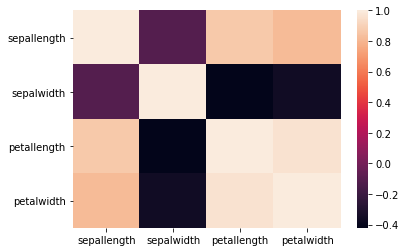

In [3]:
# b) Tìm correlation matrix, trực quan hóa
print('\n*** b) Tìm correlation matrix, trực quan hóa:')
corr = data.corr()
print('   - Ma trận hiệp phương sai', corr.shape, ': \n', corr, '\n')
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [4]:
# c) Thực hiện giảm chiều dữ liệu xuống còn k = 2, với sklearn.PCA
print('\n*** c) Thực hiện giảm chiều dữ liệu với sklearn.PCA:')
A = data[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']].values
print('   - Ma trận A: \n', A[0:5], '\n')

pca = PCA(2)
pca.fit(A)

# access values and vectors
# components_ : array, shape (n_components, n_features)
# Các trục chính trong không gian feature, biểu thị
# các hướng của phương sai tối đa trong dữ liệu
# explained_variance_ : array, shape (n_components,)
# Số lượng phương sai được giải thích bởi từng thành phần được chọn.
print('PCA.Components:\n', pca.components_)
print('PCA.Shape: ', pca.components_.shape)
print('PCA.Explained variance: ', pca.explained_variance_)
print('PCA.Explained variance shape: ', pca.explained_variance_.shape)

# transform data
B = pca.transform(A)
print('         - Ma trận B_T', B.shape, ': \n', B[0:5], '\n')
print(pca.explained_variance_ratio_)



*** c) Thực hiện giảm chiều dữ liệu với sklearn.PCA:
   - Ma trận A: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

PCA.Components:
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
PCA.Shape:  (2, 4)
PCA.Explained variance:  [4.22484077 0.24224357]
PCA.Explained variance shape:  (2,)
         - Ma trận B_T (150, 2) : 
 [[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]] 

[0.92461621 0.05301557]



*** d) Trực quan hóa dữ liệu:


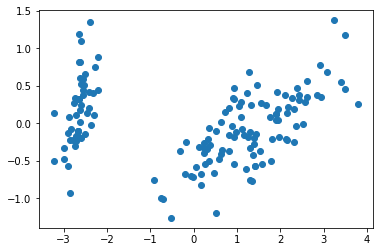

       PC 1      PC 2
0 -2.684207  0.326607
1 -2.715391 -0.169557
2 -2.889820 -0.137346
3 -2.746437 -0.311124
4 -2.728593  0.333925 

         - Ma trận P (150, 3) : 
        PC 1      PC 2        Types
0 -2.684207  0.326607  Iris-setosa
1 -2.715391 -0.169557  Iris-setosa
2 -2.889820 -0.137346  Iris-setosa
3 -2.746437 -0.311124  Iris-setosa
4 -2.728593  0.333925  Iris-setosa 



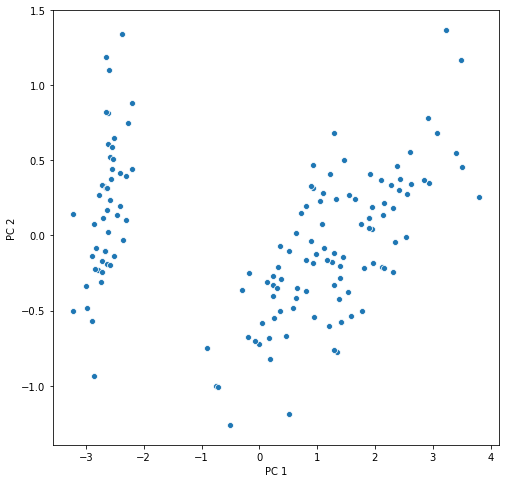

In [5]:
# d) Trực quan hóa dữ liệu
print('\n*** d) Trực quan hóa dữ liệu:')
plt.scatter(B[:, 0], B[:, 1])
plt.show()

principalDf = pd.DataFrame(data=B, columns=['PC 1', 'PC 2'])
print(principalDf.head(), '\n')

y = np.array(data.iris)
y = pd.DataFrame(data=y, columns=['Types'])
finalDf = pd.concat([principalDf, y], axis=1)
print('         - Ma trận P', finalDf.shape, ': \n', finalDf[0:5], '\n')

plt.figure(figsize=(8, 8))
sns.scatterplot(x='PC 1', y='PC 2', data=finalDf)
plt.show()